Problem statement:

-To predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Preprocessing:

In [2]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
242,LP001806,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
312,LP002006,Female,No,0,Graduate,No,2507,0.0,56.0,360.0,1.0,Rural,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
461,LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
316,LP002035,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban,Y
230,LP001765,Male,Yes,1,Graduate,No,2491,2054.0,104.0,360.0,1.0,Semiurban,Y
162,LP001565,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban,N


In [3]:
#checking for datatype

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
#checking for null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Loan_ID , Education , ApplicantIncome , CoapplicantIncome , Property_Area , Loan_Status have zero null values

- okay so the datasets have missing values, so we will perform imputation using SimpleImputer to fill the null values

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

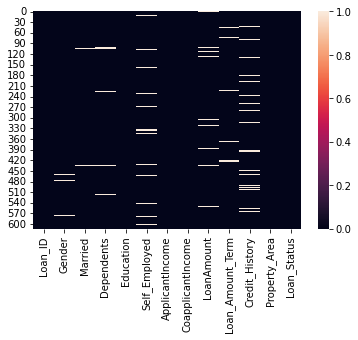

In [6]:
sns.heatmap(df.isnull())

In [20]:
#creating empty list for categorical and continuous variables which have null values

cat=[]
intt=[]

for i in df.columns:
    if df[i].isnull().sum()>0 and df[i].dtypes=='object':
        cat.append(i)
    elif df[i].isnull().sum()>0 and df[i].dtypes=='float64':
        intt.append(i)
    else:
        pass

print(cat,'\n')
print(intt)

['Gender', 'Married', 'Dependents', 'Self_Employed'] 

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [21]:
#now using imputation technique to fill the missing values

from sklearn.impute import SimpleImputer

for i in cat:
    df[i]=SimpleImputer(strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

for j in intt:
    df[j]=SimpleImputer(strategy='mean').fit_transform(df[j].values.reshape(-1,1))
    
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

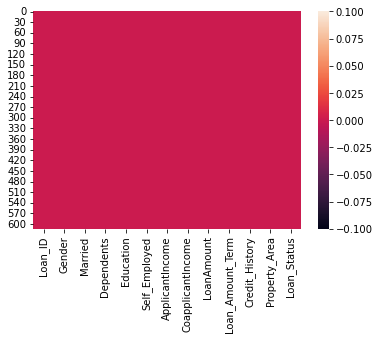

In [22]:
sns.heatmap(df.isnull())

- null values have been replaced

In [23]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [24]:
#checking for unique value counts

for i in df.columns:
    print(df[i].value_counts(),'\n','\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64 
 

Male      502
Female    112
Name: Gender, dtype: int64 
 

Yes    401
No     213
Name: Married, dtype: int64 
 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 
 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 
 

No     532
Yes     82
Name: Self_Employed, dtype: int64 
 

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64 
 

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64 
 

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.0

- all object datatype variables have 2-4 unique classes
- the data is imbalanced
- first we will perform EDA and after that we will encode object dtype variables

# EDA:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- as the dataset have object and integer dataype only, and the target variable is of object dtype, we will use catplot for numerical independent variable and countplot for object dtype variables

In [26]:
#so lets build a function for this

def cat(i):                                 #for categorical data
    sns.catplot('Loan_Status',i,data=df)
    plt.show()
    
def count(i):
    sns.countplot(df[i],hue=df['Loan_Status'])
    plt.show()

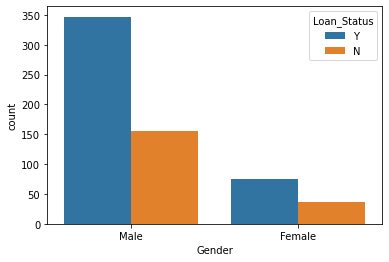

In [27]:
count('Gender')

- this variable is imbalanced
- male applicants have a higher count than female ones

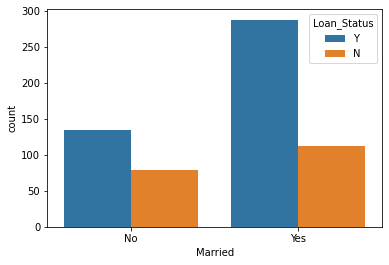

In [28]:
count('Married')

- most applicants are Married
- the data is imbalanced

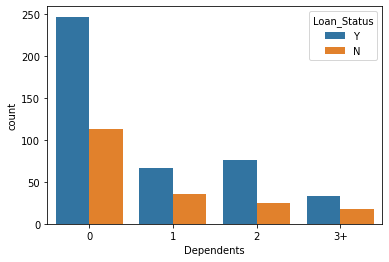

In [29]:
count('Dependents')

- O Dependents have the highest count

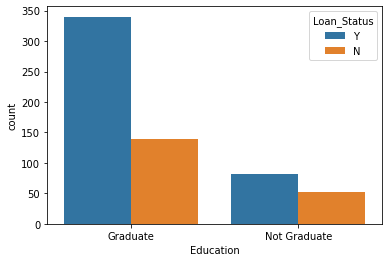

In [30]:
count('Education')

- though the data is imbalanced chances of passing a loan is higher for Graduated applicants

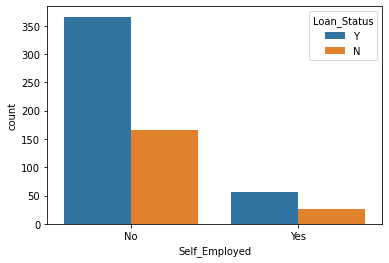

In [31]:
count('Self_Employed')

- for self employed applicants loan passing rates are low

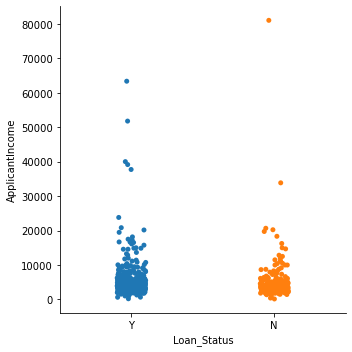

In [32]:
cat('ApplicantIncome')

- at income more than 80000 not passing of loan chances are higher
- for income range 38000-65000 loan passing chances are certainly higher
- for low income range data is distributed nicely for both the classes of target variable

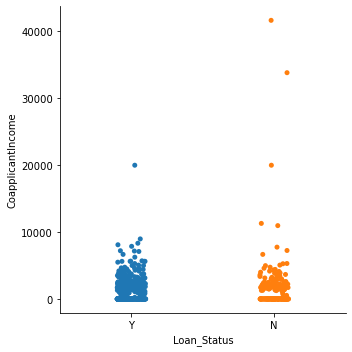

In [33]:
cat('CoapplicantIncome')

- higher coapplicant income ranges have almost null chances of passing a loan

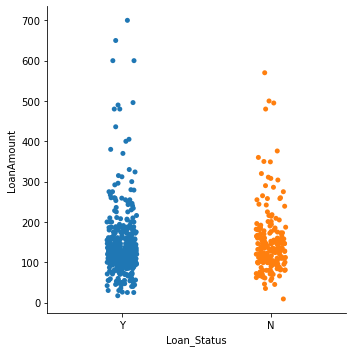

In [35]:
cat('LoanAmount')

- higher LoanAmount have higher chances of passing a loan

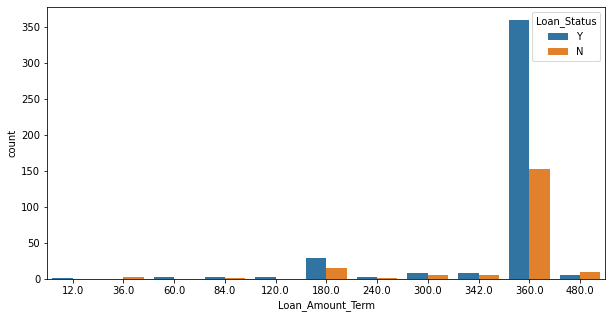

In [38]:
plt.figure(figsize=(10,5))
sns.countplot('Loan_Amount_Term',data=df,hue=df['Loan_Status'])
plt.show()

- the  data is highly imabalanced

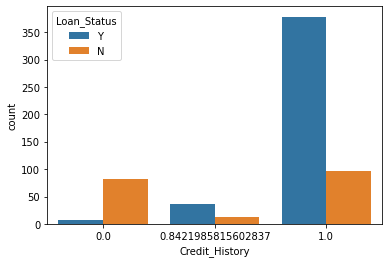

In [40]:
count('Credit_History')

- credit history zero have more chances of not passing a loan

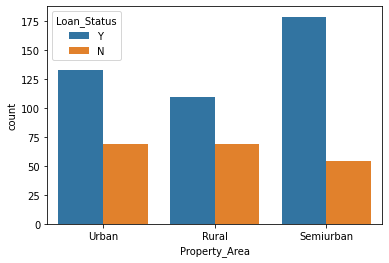

In [41]:
count('Property_Area')

- SemiUrban PropertyArea have the highest loan passing chances, For Rural Areas both classes are reasonable

In [42]:
#now lets LabelEncode the object datatype variables

cat=[]  #creating an empty list for categorical variables
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        pass
    

# now removing Loan_ID, as this variable has all unique values so it would be tricky to encode it

cat.remove('Loan_ID')

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])
    
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
41,LP001120,1,0,0,0,0,1800,1213.0,47.0,360.0,1.0,2,1


In [43]:
#now checking for dtypes

df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [44]:
#dropping Loan_ID

df.drop('Loan_ID',axis=1,inplace=True)

In [45]:
#checking for correlation

df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


In [46]:
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

- Credit History has a strong correlation bond with the target variable
- Married , Property_Area , Gender , Dependents have weak correlation bond with target variable
- all the left variables have negative correlation Bond with Loan_Status

<Figure size 432x288 with 0 Axes>

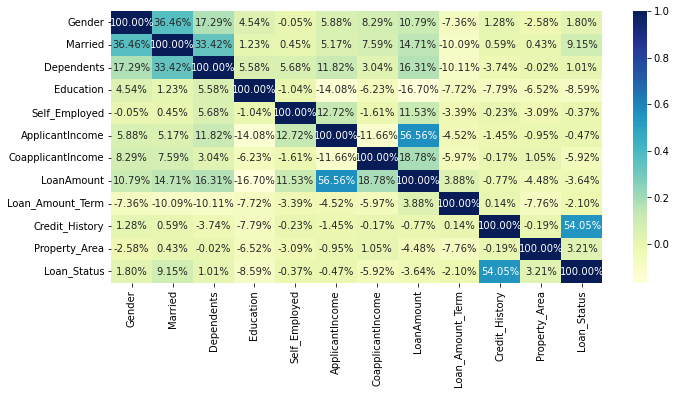

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(11,5))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2%')
plt.figure()

In [48]:
# now let's, describe our dataset:

df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


obseravtions:
- mean for some variables is higher or lower than their median values, so skewness might be there
- ApplicantIncome , CoapplicantIncome have a wide range of data
- because of imbalanced distribution outliers might be also there

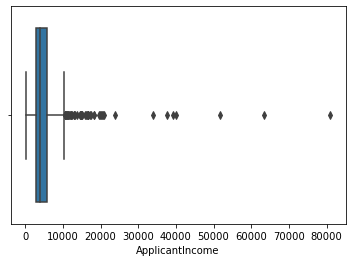

In [49]:
#let's check for outliers

sns.boxplot(df['ApplicantIncome'])
plt.show()

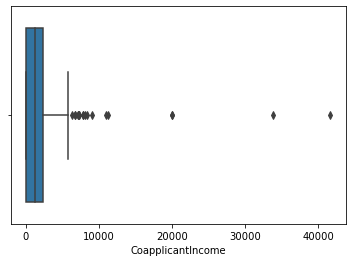

In [50]:
#let's check for outliers

sns.boxplot(df['CoapplicantIncome'])
plt.show()

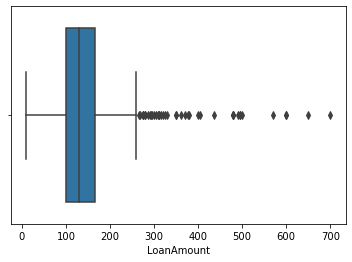

In [51]:
#let's check for outliers

sns.boxplot(df['LoanAmount'])
plt.show()

- so outliers are present in the dataset

# Data Cleaning:

In [52]:
#lets check out for outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

#threhold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [53]:
#so outliers are present, so we are going to see how much data is being lost

df_new=df[(z<3).all(axis=1)]

In [54]:
df.shape

(614, 12)

In [55]:
df_new.shape

(577, 12)

In [56]:
print('Data Loss is:',(614-577)/614*100,'%')

Data Loss is: 6.026058631921824 %


- so data loss is less than 10%, so we will use dataset with no outliers, as due to imbalance data we are going to do over sampling later

In [132]:
# now selecting our feature and target variable for further process

x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

print(x.shape)
print(y.shape)

(577, 11)
(577,)


In [133]:
#checking for skewness

x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
dtype: float64

- threshold = +/- 0.50 , so all the variables except Property_Area are exceeding the threshold, we will try to reduce the skewness

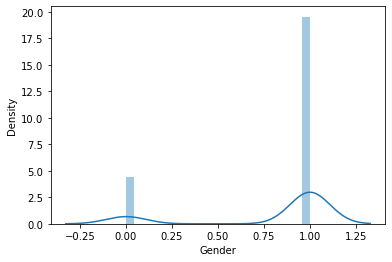

In [60]:
sns.distplot(df_new['Gender'])
plt.show()

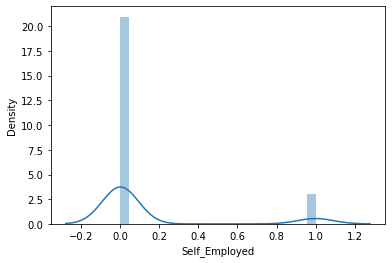

In [61]:
sns.distplot(df_new['Self_Employed'])
plt.show()

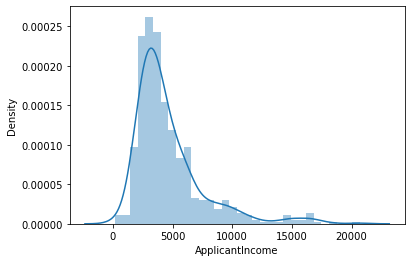

In [62]:
sns.distplot(df_new['ApplicantIncome'])
plt.show()

- so it can be seen that skewness is there

In [63]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [139]:
#using power_transform method

from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')
x=pd.DataFrame(x,columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.588827
Property_Area       -0.155094
dtype: float64

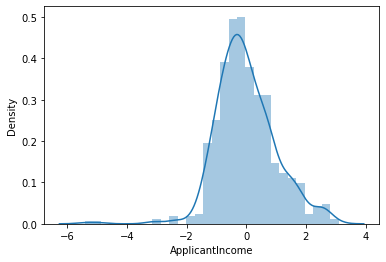

In [66]:
sns.distplot(x['ApplicantIncome'])
plt.show()

- skewness has been reduced for some variables

In [67]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [68]:
vif_calc()

    VIF Factor           features
0     1.220099             Gender
1     1.432799            Married
2     1.183858         Dependents
3     1.067987          Education
4     1.055620      Self_Employed
5     1.767052    ApplicantIncome
6     1.577425  CoapplicantIncome
7     1.548431         LoanAmount
8     1.048591   Loan_Amount_Term
9     1.012913     Credit_History
10    1.025710      Property_Area


- the VIf is low for all feature variables, multicollinearity isn't present

In [140]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [141]:
#now checking if the dataset is imbalanced or not

y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

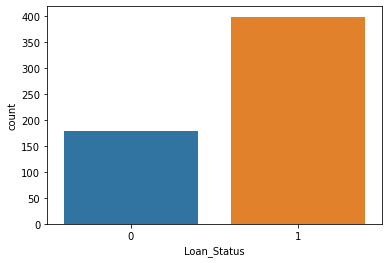

In [142]:
sns.countplot(y)
plt.show()

In [143]:
from imblearn.over_sampling import SMOTE

train_x,train_y=SMOTE().fit_resample(x,y)

print(train_x.shape)
print(train_y.shape)

(796, 11)
(796,)


In [144]:
#since this is binary classification problem first we will use LogisticRegression then we will try out some other algos too

In [74]:
#importing libraries

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
lr=LogisticRegression()

In [77]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(accuracy_score(y_test,predlr)*100)==round(accuracy_score(y_train,predtrain)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',accuracy_score(y_train,predtrain)*100)
        print('Testing accuracy score is',accuracy_score(y_test,predlr)*100,'\n')

At random state 11 the model performs very well
At random state 11 :
Training accuracy score is 73.4290843806104
Testing accuracy score is 72.80334728033473 

At random state 16 the model performs very well
At random state 16 :
Training accuracy score is 71.27468581687613
Testing accuracy score is 71.1297071129707 

At random state 28 the model performs very well
At random state 28 :
Training accuracy score is 71.45421903052065
Testing accuracy score is 70.7112970711297 

At random state 33 the model performs very well
At random state 33 :
Training accuracy score is 72.89048473967684
Testing accuracy score is 72.80334728033473 

At random state 48 the model performs very well
At random state 48 :
Training accuracy score is 71.45421903052065
Testing accuracy score is 70.7112970711297 

At random state 61 the model performs very well
At random state 61 :
Training accuracy score is 71.99281867145422
Testing accuracy score is 71.54811715481172 

At random state 67 the model performs very w

In [78]:
#using 33 as the random state for further process

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))

0.7280334728033473


In [79]:
print(accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

72.80334728033473
[[ 60  48]
 [ 17 114]]
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       108
           1       0.70      0.87      0.78       131

    accuracy                           0.73       239
   macro avg       0.74      0.71      0.71       239
weighted avg       0.74      0.73      0.72       239



In [80]:
#importing metrics

from sklearn.metrics import mean_squared_error

#checking error for LogiosticRegression
mselr=mean_squared_error(y_test,predlr)

print(mselr)

0.2719665271966527


In [81]:
#checking cross validation score for logistic regression

for j in range(2,10):
    lrs=cross_val_score(lr,train_x,train_y,cv=j)
    lrc=lrs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lrc*100)
    print('Accuracy score is:',accuracy_score(y_test,predlr)*100,'\n')

At cv= 2
Cross Validation Score is: 71.73366834170854
Accuracy score is: 72.80334728033473 

At cv= 3
Cross Validation Score is: 70.59913935782852
Accuracy score is: 72.80334728033473 

At cv= 4
Cross Validation Score is: 70.72864321608041
Accuracy score is: 72.80334728033473 

At cv= 5
Cross Validation Score is: 70.60220125786164
Accuracy score is: 72.80334728033473 

At cv= 6
Cross Validation Score is: 71.1029467608415
Accuracy score is: 72.80334728033473 

At cv= 7
Cross Validation Score is: 70.72770421629293
Accuracy score is: 72.80334728033473 

At cv= 8
Cross Validation Score is: 70.97727272727272
Accuracy score is: 72.80334728033473 

At cv= 9
Cross Validation Score is: 71.10004539779821
Accuracy score is: 72.80334728033473 



- the accuracy score is coming around cross validation score only, the model is working well

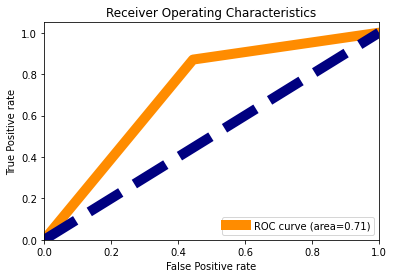

In [82]:
#roc auc plotting for logisticRegression

from sklearn.metrics import roc_curve,auc

fpr,tpr,thresholds=roc_curve(y_test,predlr)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [83]:
#now lets try some more classifcation algorithms 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


#KNeighbors

knn=KNeighborsClassifier()

x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
knn.fit(x_train,y_train)
predtrain=knn.predict(x_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn)*100)

70.29288702928869


In [84]:
print(accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

70.29288702928869
[[77 31]
 [40 91]]
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       108
           1       0.75      0.69      0.72       131

    accuracy                           0.70       239
   macro avg       0.70      0.70      0.70       239
weighted avg       0.71      0.70      0.70       239



- the recall is much better with KNeighbors than LogisticRegression

In [85]:
#checking erro for KNeighbors

mseknn=mean_squared_error(y_test,predknn)

print(mseknn)

0.29707112970711297


In [86]:
#checking cross validation score for KNeighbors

for j in range(2,10):
    knns=cross_val_score(knn,train_x,train_y,cv=j)
    knnc=knns.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',knnc*100)
    print('Accuracy score is:',accuracy_score(y_test,predknn)*100,'\n')

At cv= 2
Cross Validation Score is: 73.61809045226131
Accuracy score is: 70.29288702928869 

At cv= 3
Cross Validation Score is: 74.49614602544095
Accuracy score is: 70.29288702928869 

At cv= 4
Cross Validation Score is: 74.62311557788945
Accuracy score is: 70.29288702928869 

At cv= 5
Cross Validation Score is: 73.8687106918239
Accuracy score is: 70.29288702928869 

At cv= 6
Cross Validation Score is: 74.24527227158806
Accuracy score is: 70.29288702928869 

At cv= 7
Cross Validation Score is: 74.74770998292189
Accuracy score is: 70.29288702928869 

At cv= 8
Cross Validation Score is: 75.625
Accuracy score is: 70.29288702928869 

At cv= 9
Cross Validation Score is: 75.374531835206
Accuracy score is: 70.29288702928869 



In [87]:
#decisonTree

dtc=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
dtc.fit(x_train,y_train)
predtrain=dtc.predict(x_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc)*100)

76.98744769874477


In [88]:
print(accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

76.98744769874477
[[86 22]
 [33 98]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       108
           1       0.82      0.75      0.78       131

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



In [89]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)

print(msedtc)

0.2301255230125523


In [90]:
#checking cross validation score for DecsionTree

for j in range(2,10):
    dtcs=cross_val_score(dtc,train_x,train_y,cv=j)
    dtcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',dtcc*100)
    print('Accuracy score is:',accuracy_score(y_test,preddtc)*100,'\n')

At cv= 2
Cross Validation Score is: 75.7537688442211
Accuracy score is: 76.98744769874477 

At cv= 3
Cross Validation Score is: 76.89033905518514
Accuracy score is: 76.98744769874477 

At cv= 4
Cross Validation Score is: 78.14070351758792
Accuracy score is: 76.98744769874477 

At cv= 5
Cross Validation Score is: 76.38915094339623
Accuracy score is: 76.98744769874477 

At cv= 6
Cross Validation Score is: 77.52715121136174
Accuracy score is: 76.98744769874477 

At cv= 7
Cross Validation Score is: 78.40841040654735
Accuracy score is: 76.98744769874477 

At cv= 8
Cross Validation Score is: 77.54419191919192
Accuracy score is: 76.98744769874477 

At cv= 9
Cross Validation Score is: 79.05317217114968
Accuracy score is: 76.98744769874477 



In [91]:
#SVC

svc=SVC()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
svc.fit(x_train,y_train)
predtrain=svc.predict(x_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc)*100)

71.1297071129707


In [92]:
print(accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

71.1297071129707
[[ 67  41]
 [ 28 103]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       108
           1       0.72      0.79      0.75       131

    accuracy                           0.71       239
   macro avg       0.71      0.70      0.70       239
weighted avg       0.71      0.71      0.71       239



In [93]:
#checking error for SVC

msesvc=mean_squared_error(y_test,predsvc)

print(msesvc)

0.28870292887029286


In [94]:
#checking cross validation score for SVC

for j in range(2,6):
    svcs=cross_val_score(svc,train_x,train_y,cv=j)
    svcc=dtcs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',svcc*100)
    print('Accuracy score is:',accuracy_score(y_test,predsvc)*100,'\n')

At cv= 2
Cross Validation Score is: 79.05317217114968
Accuracy score is: 71.1297071129707 

At cv= 3
Cross Validation Score is: 79.05317217114968
Accuracy score is: 71.1297071129707 

At cv= 4
Cross Validation Score is: 79.05317217114968
Accuracy score is: 71.1297071129707 

At cv= 5
Cross Validation Score is: 79.05317217114968
Accuracy score is: 71.1297071129707 



- the model is underfitting with SVC

# Ensemble:

In [95]:
#now, let's try some ensemble techniques:

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [96]:
#RandomForestClassifier

rf=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf)*100)

80.75313807531381


In [97]:
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

80.75313807531381
[[ 83  25]
 [ 21 110]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       108
           1       0.81      0.84      0.83       131

    accuracy                           0.81       239
   macro avg       0.81      0.80      0.81       239
weighted avg       0.81      0.81      0.81       239



- recall is poor with RandomForest though accuracy is great

In [98]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)

print(mserf)

0.19246861924686193


In [99]:
#checking cross validation score for RandomForest

for j in range(2,7):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100)
    print('Accuracy score is:',accuracy_score(y_test,predrf)*100,'\n')

At cv= 2
Cross Validation Score is: 78.64321608040201
Accuracy score is: 80.75313807531381 

At cv= 3
Cross Validation Score is: 81.91374663072777
Accuracy score is: 80.75313807531381 

At cv= 4
Cross Validation Score is: 83.04020100502512
Accuracy score is: 80.75313807531381 

At cv= 5
Cross Validation Score is: 83.7995283018868
Accuracy score is: 80.75313807531381 

At cv= 6
Cross Validation Score is: 83.18143844459634
Accuracy score is: 80.75313807531381 



In [100]:
#AdaBoostClassifier

ada=AdaBoostClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
ada.fit(x_train,y_train)
predtrain=ada.predict(x_train)
predada=ada.predict(x_test)

print(accuracy_score(y_test,predada)*100)

75.73221757322176


In [101]:
print(accuracy_score(y_test,predada)*100)
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

75.73221757322176
[[ 76  32]
 [ 26 105]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       108
           1       0.77      0.80      0.78       131

    accuracy                           0.76       239
   macro avg       0.76      0.75      0.75       239
weighted avg       0.76      0.76      0.76       239



In [102]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)

print(mseada)

0.24267782426778242


In [103]:
#checking cross validation score for AdaBoost

for j in range(2,6):
    adas=cross_val_score(ada,train_x,train_y,cv=j)
    adac=adas.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',adac*100)
    print('Accuracy score is:',accuracy_score(y_test,predada)*100,'\n')

At cv= 2
Cross Validation Score is: 71.73366834170854
Accuracy score is: 75.73221757322176 

At cv= 3
Cross Validation Score is: 73.24254031304676
Accuracy score is: 75.73221757322176 

At cv= 4
Cross Validation Score is: 73.36683417085426
Accuracy score is: 75.73221757322176 

At cv= 5
Cross Validation Score is: 75.51179245283019
Accuracy score is: 75.73221757322176 



In [104]:
#GradientBoostingClassifier

gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
gb.fit(x_train,y_train)
predtrain=gb.predict(x_train)
predgb=gb.predict(x_test)

print(accuracy_score(y_test,predgb)*100)

79.49790794979079


In [105]:
print(accuracy_score(y_test,predgb)*100)
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

79.49790794979079
[[ 77  31]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       108
           1       0.78      0.86      0.82       131

    accuracy                           0.79       239
   macro avg       0.80      0.79      0.79       239
weighted avg       0.80      0.79      0.79       239



In [106]:
msegb=mean_squared_error(y_test,predgb)

print(msegb)

0.20502092050209206


In [107]:
#checking cross validation score for GradientBoosting

for j in range(2,6):
    gbs=cross_val_score(gb,train_x,train_y,cv=j)
    gbc=gbs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',gbc*100)
    print('Accuracy score is:',accuracy_score(y_test,predgb)*100,'\n')

At cv= 2
Cross Validation Score is: 74.74874371859298
Accuracy score is: 79.49790794979079 

At cv= 3
Cross Validation Score is: 76.76644441291907
Accuracy score is: 79.49790794979079 

At cv= 4
Cross Validation Score is: 79.52261306532664
Accuracy score is: 79.49790794979079 

At cv= 5
Cross Validation Score is: 79.28694968553458
Accuracy score is: 79.49790794979079 



In [108]:
from sklearn.metrics import accuracy_score as acs

algodf=pd.DataFrame({'Mean Squared Error':[mselr,mseknn,msedtc,msesvc,mseada,msegb,mserf],'Accuracy Score':[acs(y_test,predlr),acs(y_test,predknn),acs(y_test,preddtc),acs(y_test,predsvc),acs(y_test,predada),acs(y_test,predgb),acs(y_test,predrf)]},index=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','AdaBoostClassifer','GradientBoostingClassifier','RabdomForestClassifier'])
algodf

,Mean Squared Error,Accuracy Score
LogisticRegression,0.271967,0.728033
KNeighborsClassifier,0.297071,0.702929
DecisionTreeClassifier,0.230126,0.769874
SVC,0.288703,0.711297
AdaBoostClassifer,0.242678,0.757322
GradientBoostingClassifier,0.205021,0.794979
RabdomForestClassifier,0.192469,0.807531


- the model is performing best with RandomForestClassifier

In [145]:
#doing hyperparametertuning on RandomForest for best results

from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
parameters={'criterion':["gini", "entropy"],'max_features':['sqrt','log2','auto']}
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=33,test_size=.30)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto'}


In [189]:
#finding a good random state

for i in range(100):
    rf=RandomForestClassifier(criterion='gini',max_features='auto')
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=i,test_size=.30)
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    if round(accuracy_score(y_test,predrf)*100)==86:
        print('At random state:',i)
        print(accuracy_score(y_test,predrf)*100,'\n')

At random state: 95
86.19246861924687 



In [214]:
#using the random state as 1

rf=RandomForestClassifier(criterion='gini', max_features= 'auto')
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,random_state=95,test_size=.30)
rf.fit(x_train,y_train)
predtrain=rf.predict(x_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)

86.19246861924687


In [146]:
#checking for cross validation score

rf=RandomForestClassifier(criterion='gini',max_features='auto')
for j in range(2,21):
    rfs=cross_val_score(rf,train_x,train_y,cv=j)
    rfc=rfs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 2
Cross Validation Score is: 79.52261306532662 

At cv= 3
Cross Validation Score is: 82.04237007613374 

At cv= 4
Cross Validation Score is: 83.91959798994975 

At cv= 5
Cross Validation Score is: 83.67138364779876 

At cv= 6
Cross Validation Score is: 84.80766309713678 

At cv= 7
Cross Validation Score is: 84.18723800652073 

At cv= 8
Cross Validation Score is: 84.94318181818181 

At cv= 9
Cross Validation Score is: 85.07972988310067 

At cv= 10
Cross Validation Score is: 83.80696202531645 

At cv= 11
Cross Validation Score is: 84.70319634703198 

At cv= 12
Cross Validation Score is: 85.0821649329112 

At cv= 13
Cross Validation Score is: 85.57743155839401 

At cv= 14
Cross Validation Score is: 85.06534192624419 

At cv= 15
Cross Validation Score is: 85.05474027486606 

At cv= 16
Cross Validation Score is: 85.46173469387755 

At cv= 17
Cross Validation Score is: 85.46008597703653 

At cv= 18
Cross Validation Score is: 85.21885521885521 

At cv= 19
Cross Validation Score is: 85.

In [161]:
#checking for cross validation score at cv=13

rf=RandomForestClassifier(criterion='entropy', max_features= 'sqrt')
rfs=cross_val_score(rf,train_x,train_y,cv=13)
rfc=rfs.mean()
print('Cross Validation Score is:',rfc*100,'\n')

Cross Validation Score is: 86.0859130293292 



In [162]:
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       114
           1       0.87      0.87      0.87       125

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.86      0.86      0.86       239

[[ 97  17]
 [ 16 109]]


- the recall has been improved after Hyperparameter Tuning
- Precision is also great

In [215]:
print('Mean Squared Error:',mean_squared_error(y_test,predrf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))

Mean Squared Error: 0.13807531380753138
Root Mean Squared Error: 0.3715848675706956


- the errors are close to 0, so the model is working well with great accuracy too

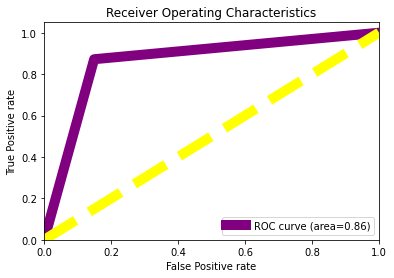

In [164]:
#roc auc plotting


fpr,tpr,thresholds=roc_curve(y_test,predrf)

roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='purple',lw=10,label='ROC curve (area=%.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='yellow',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()

In [217]:
print('The model is performing extremely well with RandomForestClassifier because we are getting both accuracy score and cross validation score as 86','\n')
print('Accuracy:',round(accuracy_score(y_test,predrf)*100))
print('Cross Validation Score:',round(rfc*100))
print('Area Under Curve:',round(auc(fpr,tpr),3))

The model is performing extremely well with RandomForestClassifier because we are getting both accuracy score and cross validation score as 86 

Accuracy: 86
Cross Validation Score: 86
Area Under Curve: 0.861


In [218]:
preddf=pd.DataFrame({'Fraud Reported':y_test,'Predicted Fraud Reported':predrf})
preddf

,Fraud Reported,Predicted Fraud Reported
299,1,1
454,1,1
185,1,1
256,1,1
100,1,1
...,...,...
720,0,0
694,0,0
658,0,0
426,0,0


In [219]:
#saving the best model

import pickle

pickle.dump(rf,open('loan.pkl','wb'))